<a href="https://colab.research.google.com/github/soloman1124/BuckyServer/blob/master/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf
from tensorflow import keras

# Helpers
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0-alpha0


In [0]:
# Load dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

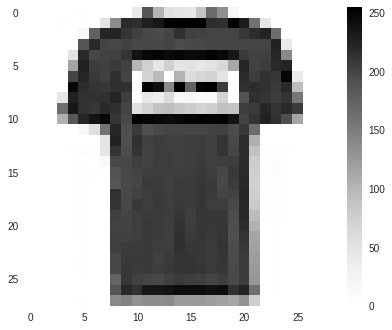

In [24]:
# Show image example

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Data preprocessing (normalise data from 0 to 1)
train_images = train_images / 255
test_images = test_images / 255

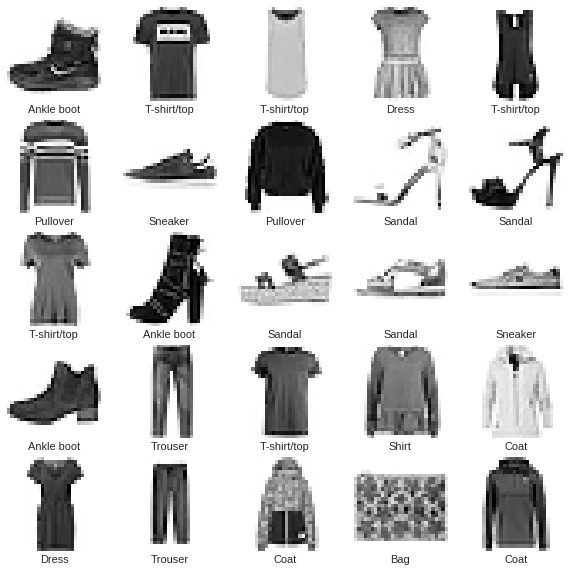

In [32]:
# show some images
plt.figure(figsize=[10, 10])
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Build the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Train the model


model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4955 - accuracy: 0.8257
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3699 - accuracy: 0.8663
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3338 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3127 - accuracy: 0.8853
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2936 - accuracy: 0.8921


In [38]:
# Evaluate Accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy: ', test_acc)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3478 - accuracy: 0.8776

Test accuracy:  0.8776


In [40]:
# make prediction

predictions = model.predict(test_images)

def predict(i):
  return class_names[np.argmax(predictions[i])]

predict(4)

'T-shirt/top'